## ProShares Hedge Replication ETF

##### Vaikunthan Mathiyalakan

In [6]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import warnings

file_path = r"C:\Users\Vai.Mathi\Downloads\proshares_analysis_data.xlsx"
data = pd.read_excel(file_path, sheet_name = None, index_col = 0)
d = data["descriptions"]
hfs = data["hedge_fund_series"]
mf = data["merrill_factors"]
of = data["other_data"]

display(d)
display(hfs)
display(mf)
display(of)

,Descriptions
EEM US Equity,ISHARES MSCI EMERGING MARKET
EFA US Equity,ISHARES MSCI EAFE ETF
EUO US Equity,PROSHARES ULTRASHORT EURO
HDG US Equity,PROSHARES HEDGE REPLICAT ETF
HEFA US Equity,ISHA CURR HEDGED MSCI EAFE
HFRIFWI Index,HFRI Fund Weighted Composite I
IWM US Equity,ISHARES RUSSELL 2000 ETF
MLEIFCTR Index,ML Factor Model
MLEIFCTX Index,ML Factor ModelX
QAI US Equity,IQ HEDGE MULTI-STRAT TRACKER


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2011-10-31,0.026858,0.043593,0.043320,0.050532,0.025241
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001854
...,...,...,...,...,...
2023-01-31,0.026600,0.034428,0.034050,0.035244,0.029164
2023-02-28,-0.006382,-0.001587,-0.001932,-0.002426,-0.008538
2023-03-31,-0.008032,-0.004996,-0.004926,-0.006959,0.005856
2023-04-30,0.002378,0.000852,0.000333,-0.000440,0.005135


,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
2011-09-30,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
2011-10-31,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
2011-11-30,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
2011-12-31,0.010440,0.000009,-0.043017,-0.022139,0.075581,0.005114
...,...,...,...,...,...,...
2023-01-31,0.062887,0.003868,0.091292,0.090037,-0.025467,0.098188
2023-02-28,-0.025143,0.003974,-0.075677,-0.030748,0.059930,-0.017234
2023-03-31,0.037125,0.003911,0.032173,0.031291,-0.045368,-0.048459
2023-04-30,0.015975,0.004192,-0.008363,0.029362,-0.027593,-0.017937


,TRVCI Index,HEFA US Equity,TAIL US Equity,SPXU US Equity,UPRO US Equity
2011-08-31,-0.065162,NaN,NaN,0.056476,-0.210881
2011-09-30,-0.036807,NaN,NaN,0.190006,-0.206915
2011-10-31,0.099964,NaN,NaN,-0.298828,0.326032
2011-11-30,-0.035844,NaN,NaN,-0.035515,-0.033508
2011-12-31,-0.025485,NaN,NaN,-0.051986,0.022923
...,...,...,...,...,...
2023-01-31,0.101082,0.076666,-0.025491,-0.167756,0.181262
2023-02-28,-0.041195,0.002408,-0.021461,0.081911,-0.087316
2023-03-31,0.057387,0.011324,0.015476,-0.105904,0.094354
2023-04-30,0.013826,0.026468,-0.004765,-0.037836,0.036037


In [7]:
# Suppress specific warnings - fromt ChatGPT as solution to weird output from 3
warnings.filterwarnings("ignore")

## from github 
def calc_univariate_regression(y, X, intercept=True, adj=12):
    X_down = X[y < 0]
    y_down = y[y < 0]
    if intercept:
        X = sm.add_constant(X)
        X_down = sm.add_constant(X_down)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()

    inter = results.params[0] if intercept else 0
    beta = results.params[1] if intercept else results.params[0]

    summary = dict()

    summary["Alpha"] = inter * adj
    summary["Beta"] = beta

    down_mod = sm.OLS(y_down, X_down, missing="drop").fit()
    summary["Downside Beta"] = down_mod.params[1] if intercept else down_mod.params[0]

    summary["R-Squared"] = results.rsquared
    summary["Treynor Ratio"] = (y.mean() / beta) * adj
    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = (
        inter / summary["Information Ratio"]
        if intercept
        else results.resid.std() * np.sqrt(adj))

    return pd.DataFrame(summary, index=[y.name])


def calc_multivariate_regression(y, X, intercept=True, adj=12):
    if intercept:
        X = sm.add_constant(X)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()
    summary = dict()

    inter = results.params[0] if intercept else 0
    betas = results.params[1:] if intercept else results.params

    summary["Alpha"] = inter * adj
    summary["R-Squared"] = results.rsquared

    X_cols = X.columns[1:] if intercept else X.columns

    for i, col in enumerate(X_cols):
        summary[f"{col} Beta"] = betas[i]

    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = (
        inter / summary["Information Ratio"]
        if intercept
        else results.resid.std() * np.sqrt(adj)
    )
    return pd.DataFrame(summary, index=[y.name])

def calc_iterative_regression(y, X, intercept=True, one_to_many=False, adj=12):
    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.DataFrame):
        raise TypeError("X and y must both be DataFrames.")

    if one_to_many:
        if isinstance(X, pd.Series) or X.shape[1] > 1:
            summary = pd.concat(
                [
                    calc_multivariate_regression(y[col], X, intercept, adj)
                    for col in y.columns
                ],
                axis=0,
            )
        else:
            summary = pd.concat(
                [
                    calc_univariate_regression(y[col], X, intercept, adj)
                    for col in y.columns
                ],
                axis=0,
            )
        summary.index = y.columns
        return summary
    else:
        summary = pd.concat(
            [
                calc_univariate_regression(y, X[col], intercept, adj)
                for col in X.columns
            ],
            axis=0,
        )
        summary.index = X.columns
        return summary

### 1. For the series in the "hedge_fund_series" tab, report the following summary statistics:
##### (a) mean
##### (b) volatility
##### (c) Sharpe ratio
#### Annualize these statistics.


In [8]:
def performance_summary(hfs, as_df = False, adj_factor = 12):
    summary = {}
    summary["Annualized Return"] = hfs.mean() * adj_factor
    summary["Annualized Volatility"] = hfs.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = summary["Annualized Return"] / summary["Annualized Volatility"]
    return pd.DataFrame(summary, index=hfs.columns) if as_df else summary

returns = performance_summary(hfs, True, adj_factor= 12)
returns


,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
HFRIFWI Index,0.041447,0.060416,0.686023
MLEIFCTR Index,0.030670,0.057147,0.536686
MLEIFCTX Index,0.029239,0.056985,0.513102
HDG US Equity,0.019442,0.059589,0.326268
QAI US Equity,0.016958,0.049895,0.339873


### 2. For the series in the "hedge_fund_series" tab, calculate the following statistics related to tail-risk:

#### (a) Skewness
#### (b) Kurtosis
#### (c) the fifth quantile of historic returns, which is also known as the Value-at-Risk (VaR)
#### (d) the mean of the returns at or below the fifth quantile, which is also known as the Conditional Value-at-Risk (CVaR)
#### (e) Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.


In [9]:
def risk_summary(hfs, as_df=True):
    summary = {}
    summary["Skewness"] = hfs.skew()
    summary["Kurtosis"] = hfs.kurtosis()
    summary["VaR"] = hfs.quantile(.05)
    summary["CVar"] = hfs[hfs <= hfs.quantile(0.05, axis = 0)].mean()
    
    wealth_index = 1000 * (1 + hfs).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    summary["Max Drawndown"] = drawdowns.min()
    summary["Peak"] = previous_peaks.idxmax()
    summary["Bottom"] = drawdowns.idxmin()
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin() :]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
        
    summary["Recovery"] = ["-" if pd.isnull(i) else i for i in recovery_date]
    summary["Duration (days)"] = [(i - j).days if i != "-" else "-" for i, j in zip(summary["Recovery"], summary["Bottom"])]

    return pd.DataFrame(summary, index=hfs.columns) if as_df else summary

risks = risk_summary(hfs)
display(risks)

,Skewness,Kurtosis,VaR,CVar,Max Drawndown,Peak,Bottom,Recovery,Duration (days)
HFRIFWI Index,-0.979063,5.955123,-0.025324,-0.037478,-0.115473,2021-10-31,2020-03-31,2020-08-31 00:00:00,153
MLEIFCTR Index,-0.244981,1.689648,-0.028764,-0.035857,-0.124302,2021-06-30,2022-09-30,-,-
MLEIFCTX Index,-0.231032,1.657903,-0.029119,-0.035816,-0.124388,2021-06-30,2022-09-30,-,-
HDG US Equity,-0.233880,1.799098,-0.031209,-0.037577,-0.140721,2021-06-30,2022-09-30,-,-
QAI US Equity,-0.461338,1.825993,-0.020593,-0.032695,-0.137712,2021-06-30,2022-09-30,-,-


### 3. For the series in the "hedge_fund_series" tab, run a regression of each against SPY (found in the "merrill_factors" tab).
##### Include an intercept. Report the following regression-based statistics:

##### (a) Market Beta
##### (b) Treynor Ratio
##### (c) Information ratio

##### No need to annualize the market beta. The Treynor ratio is annualized by multiplying by the number of periods in a year (12).
##### The Information ratio is annualized by multiplying by √12.


In [10]:
spy = mf[['SPY US Equity']].set_index(hfs.index)
regression_metrics = calc_iterative_regression(hfs, spy, one_to_many=True)
display(regression_metrics) 

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
HFRIFWI Index,-0.003559,0.348217,0.291382,0.710668,0.119027,-0.109520,0.002708
MLEIFCTR Index,-0.014549,0.349859,0.290561,0.801824,0.087664,-0.571877,0.002120
MLEIFCTX Index,-0.015806,0.348514,0.288664,0.800212,0.083896,-0.620547,0.002123
HDG US Equity,-0.027027,0.359536,0.281827,0.778808,0.054075,-0.964387,0.002335
QAI US Equity,-0.021053,0.294096,0.216788,0.743252,0.057662,-0.832728,0.002107


### 4. Relative Performance
##### Discuss the previous statistics, and what they tell us about...

##### (a) the differences between SPY and the hedge-fund series?
##### (b) which performs better between HDG and QAI.
##### (c) whether HDG and the ML series capture the most notable properties of HFRI.


In [11]:
combined_df = pd.merge(returns, risks, left_index=True, right_index=True)


spy_returns = performance_summary(spy, True)
spy_risks = risk_summary(spy, True)
spy_combined_metrics = pd.merge(spy_returns, spy_risks, left_index=True, right_index=True)
result = pd.concat([spy_combined_metrics, combined_df])
result

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Skewness,Kurtosis,VaR,CVar,Max Drawndown,Peak,Bottom,Recovery,Duration (days)
SPY US Equity,0.129248,0.146265,0.883658,-0.405414,0.796696,-0.068837,-0.086619,-0.239280,2021-12-31,2022-09-30,-,-
HFRIFWI Index,0.041447,0.060416,0.686023,-0.979063,5.955123,-0.025324,-0.037478,-0.115473,2021-10-31,2020-03-31,2020-08-31 00:00:00,153
MLEIFCTR Index,0.030670,0.057147,0.536686,-0.244981,1.689648,-0.028764,-0.035857,-0.124302,2021-06-30,2022-09-30,-,-
MLEIFCTX Index,0.029239,0.056985,0.513102,-0.231032,1.657903,-0.029119,-0.035816,-0.124388,2021-06-30,2022-09-30,-,-
HDG US Equity,0.019442,0.059589,0.326268,-0.233880,1.799098,-0.031209,-0.037577,-0.140721,2021-06-30,2022-09-30,-,-
QAI US Equity,0.016958,0.049895,0.339873,-0.461338,1.825993,-0.020593,-0.032695,-0.137712,2021-06-30,2022-09-30,-,-


##### (a) Spy has higher annualized returns, voltaility, and sharpe ratio. However SPY has a higher max drawdown and lower var and cvar. This indicates that SPY is the most risky in the dataset. However all of the hedge funds have R-squared values ranging from 0.71 to 0.8 indicating that there are highly correlated and do not offer much diversification and offer negative alpha. However since their downside beta is less then the beta it seems that they are able to hedge against general market risk.
##### (b) These funds are very similar although QAI is slightly better because of a high annualized sharpe ratio, smaller max drawdown, and slightly less correlation with SPY
##### (c) Yes. They have similar metrics across the board although HRFI has a better sharpe  ratio. Additionally HRFI has a significantly bigger kurtosis which implies  that occasionally the fund will bring extreme returns. The other funds do not have anywhere near that high of a kurtosis 

### 5. Report the correlation matrix for these assets.

##### (a) Show the correlations as a heat map.
##### (b) Which series have the highest and lowest correlations?


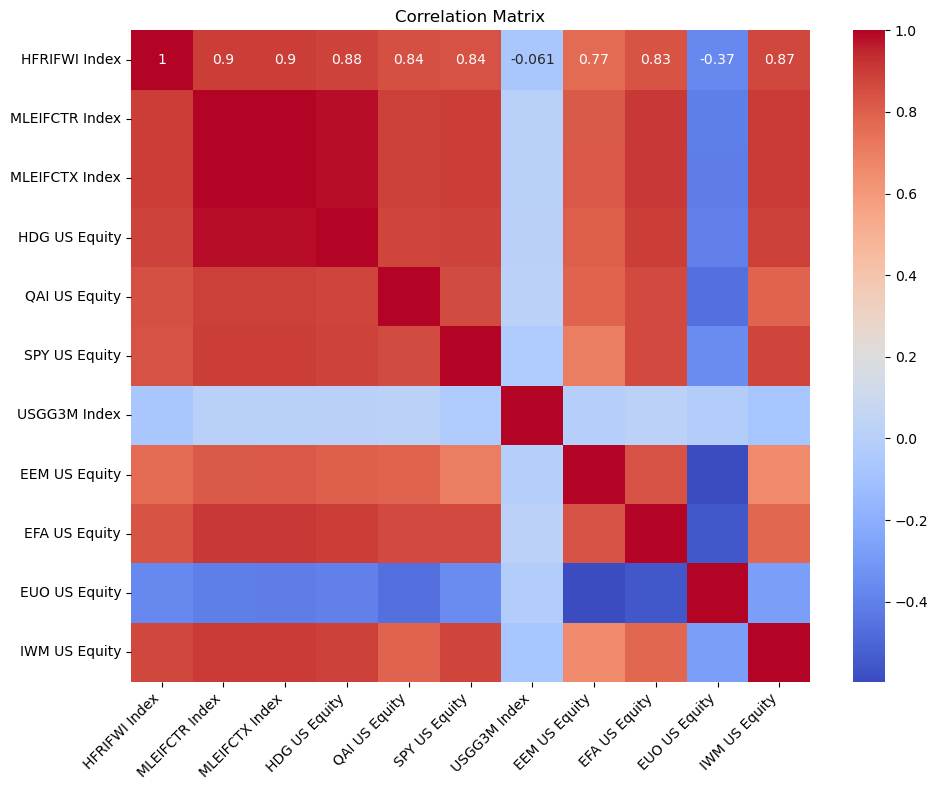

In [12]:
def plot_heatmap(correlation_matrix): 
    return sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

correlation_matrix = pd.concat([hfs, mf], axis = 1).corr()

plt.subplots(figsize = (10,8))
ax = plot_heatmap(correlation_matrix)
ax.set_title('Correlation Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.tight_layout()

In [13]:
def max_min_corr(correlation_matrix):
    correlation_series = correlation_matrix.unstack()
    correlation_series = correlation_series[correlation_series != 1]
    
    max_corr = correlation_series.abs().agg(["idxmax", "max"]).T 
    min_corr = correlation_series.abs().agg(["idxmin", "min"]).T
    min_corr_raw = correlation_series.agg(["idxmin", "min"]).T
    
    max_corr, max_corr_value = max_corr["idxmax"], max_corr["max"]
    min_corr, min_corr_value = min_corr["idxmin"], min_corr["min"]
    min_corr_raw, min_corr_raw_value = min_corr_raw["idxmin"], min_corr_raw["min"]
    
    print(f'Maximum correlation by absolute value: {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_value}')
    print(f'Minimum correlation by absolute value: {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_value}')
    print(f'Raw minimum correlation: {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_value}')
    
max_min_corr(correlation_matrix)

Maximum correlation by absolute value: MLEIFCTR Index and MLEIFCTX Index with a correlation of 0.9999250790945599
Minimum correlation by absolute value: MLEIFCTX Index and USGG3M Index with a correlation of 0.006336303354738432
Raw minimum correlation: EEM US Equity and EUO US Equity with a correlation of -0.5960917459323629


### 6. Replicate HFRI with the six factors listed on the "merrill_factors" tab. Include a constant, and run the unrestricted regression,

##### $$ r_{t}^{hfri} = \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr} $$
###### $$ \hat{r}_{t}^{hfri} \equiv \hat{\alpha}^{merr} + x_{t}^{merr}\hat{\beta}^{merr} $$

##### Note that the second equation is just our notation for the fitted replication.

##### (a) Report the intercept and betas.
##### (b) Are the betas realistic position sizes, or do they require huge long-short positions?
##### (c) Report the R-squared.
##### (d) Report the volatility of $ \epsilon_{t}^{merr} $, (the tracking error.)


In [14]:
replication = pd.concat([calc_multivariate_regression(hfs["HFRIFWI Index"], mf).T, calc_multivariate_regression(hfs["HFRIFWI Index"], mf, intercept=False).T,],axis=1,)
replication.columns = ["HFRI (Intercept)", "HFRI (No Intercept)"]
replication

,HFRI (Intercept),HFRI (No Intercept)
Alpha,0.017794,0.000000
R-Squared,0.836058,0.838049
SPY US Equity Beta,0.029963,0.049049
USGG3M Index Beta,-0.370915,0.245748
EEM US Equity Beta,0.079118,0.079039
EFA US Equity Beta,0.084161,0.075246
EUO US Equity Beta,0.023106,0.025851
IWM US Equity Beta,0.153294,0.150139
Information Ratio,0.727413,0.000000
Tracking Error,0.002039,0.024592


##### We have a an annualized alpha of 0.0178 and a set of betas in the chart above. 
##### Since the most extreme position is the beta of USGG3M Index Beta which has a beta of -37%. Although this would require a lot of T-bill shorting, it is certainly attainable for a hedge fund.
##### The R-Squared value is approximately 0.84
##### The tracking error with the intercept is approximately 0.002039 with the intercept or 0.024592 without the intercept

